# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Prédicteur infox tfidf + pytorch

---

# Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

## Labels et Articles

In [3]:
import patat.db.label_db

In [4]:
importlib.reload(patat.db.label_db)
label_filename = ''

label_db = patat.db.label_db.LabelDb(label_filename)
label_db.df()

,url,value,label,owner,type,url_h
0,https://www.breizh-info.com/2022/09/30/208531/...,0.002348,infox,221028-InfoxPipe,pred,7a183e0e5a2d7643350d9cb3fe655cb8e05d2892
1,https://www.breizh-info.com/2022/10/02/208574/...,0.024418,infox,221028-InfoxPipe,pred,242c9ea99be61b3e67d040b9a15423556b0a226c
2,https://www.dreuz.info/2022/10/elections-de-mi...,0.025664,infox,221028-InfoxPipe,pred,6294a8e958f020eb3d151176bdd437626d490b43
3,https://www.dreuz.info/2022/10/lukraine-est-en...,0.052985,infox,221028-InfoxPipe,pred,3f2abdc980e4fc88f3b62503e4cfccf2923686f5
4,https://www.dreuz.info/2022/10/la-fda-va-publi...,0.055427,infox,221028-InfoxPipe,pred,1f3dc0cd32405aadd908368395533886a5e13fe2
...,...,...,...,...,...,...
264236,https://www.profession-gendarme.com/zelensky-e...,0.556761,infox,220930-tf_lr.pp,pred,e346761c2a99d892b26c9388480e0ee6ad6b303b
264237,https://www.profession-gendarme.com/zelensky-l...,0.164531,infox,220930-tf_lr.pp,pred,77525354644316eadab53960efa8f5fd028c7f67
264238,https://www.profession-gendarme.com/zelensky-m...,0.673791,infox,220930-tf_lr.pp,pred,fc6a074da5c02032bc9fc3f35f1044bc4029042c
264239,https://www.profession-gendarme.com/zero-mort-...,0.103192,infox,220930-tf_lr.pp,pred,e4f0a8961d79c9a5f66c80d7aa4196cb679af2b0


In [5]:
import patat.db.article_db

In [6]:
importlib.reload(patat.db.article_db)
article_filename = ''

article_db = patat.db.article_db.ArticleDb(article_filename)
article_db.df()

,url,site,title,article,abstract,author,date_iso,url_h,c_count
0,https://www.breizh-info.com/2022/09/30/208531/...,www.breizh-info.com,Réunification. Les six « insoumis » de Bretagne,"Dans l’opération que prépare Bretagne réunie, ...",NaN,NaN,2022-09-30T00:00:00,7a183e0e5a2d7643350d9cb3fe655cb8e05d2892,2292.0
1,https://www.breizh-info.com/2022/10/02/208574/...,www.breizh-info.com,"Stonehenge, patrimoine africain ? Ben voyons…","Ces dernières années, l’Histoire toute entière...",NaN,NaN,2022-10-02T00:00:00,242c9ea99be61b3e67d040b9a15423556b0a226c,5111.0
2,https://www.dreuz.info/2022/10/elections-de-mi...,www.dreuz.info,Elections américaines de mi-mandat : suivi quo...,Voici le suivi quotidien des élections des mid...,NaN,Publié par Team 100 jours le 3 octobre 2022,2022-10-03T00:00:00,6294a8e958f020eb3d151176bdd437626d490b43,5900.0
3,https://www.dreuz.info/2022/10/lukraine-est-en...,www.dreuz.info,L’Ukraine est en train de gagner la guerre,On ne saura sans doute jamais exactement qui a...,NaN,Publié par Guy Millière le 4 octobre 2022,2022-10-04T00:00:00,3f2abdc980e4fc88f3b62503e4cfccf2923686f5,9598.0
4,https://www.dreuz.info/2022/10/la-fda-va-publi...,www.dreuz.info,La FDA va publier une étude sur les effets ind...,Première réflexion : J’ai toujours été pro-cho...,NaN,Publié par Jean-Patrick Grumberg le 6 octobre...,2022-10-06T00:00:00,1f3dc0cd32405aadd908368395533886a5e13fe2,4264.0
...,...,...,...,...,...,...,...,...,...
77945,https://www.lelibrepenseur.org/une-histoire-vi...,www.lelibrepenseur.org,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,NaN,Par\nAdmin,2010-05-04T00:00:00,8c7a6ecf46d47da1912884a0c0a2837c69f7ad19,7889.0
77946,https://www.lelibrepenseur.org/actus/,www.lelibrepenseur.org,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",NaN,Par\nuser,2007-07-07T00:00:00,d4d5a37a8ff545664bea75664c8d8695e70d0941,2179.0
77947,https://www.lelibrepenseur.org/affiche-des-dec...,www.lelibrepenseur.org,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,NaN,NaN,NaN,a175027896cf79e76dfad6409694fafacf1919b3,2250.0
77948,https://www.lelibrepenseur.org/communaute/,www.lelibrepenseur.org,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,NaN,NaN,NaN,6ba257c7b15dd68cadf7dc5d6d8c584db0f1792e,2937.0


In [7]:
article_db.df().value_counts('site')

site
www.francesoir.fr              18451
www.francetvinfo.fr            14597
www.breizh-info.com             6069
www.dreuz.info                  5140
www.legorafi.fr                 4488
www.wikistrike.com              3896
www.profession-gendarme.com     3192
actu.fr                         2874
www.lelibrepenseur.org          2615
fr.sott.net                     2602
lesmoutonsrebelles.com          2174
lezarceleurs.blogspot.com       2130
lemediaen442.fr                 1875
www.cnews.fr                    1519
reseauinternational.net         1146
theconversation.com             1049
www.lesalonbeige.fr              994
lesakerfrancophone.fr            872
www.polemia.com                  623
fr.novopress.info                611
infodujour.fr                    492
lesobservateurs.ch               338
www.nouvelordremondial.cc         97
lesdeqodeurs.fr                   89
www.voltairenet.org                9
www.les-crises.fr                  5
lalettrepatriote.com             

# Experience
---

## Données d'entrainement

In [8]:
df_labels = label_db.df()

In [9]:
df_labels = df_labels[df_labels['owner']=='recueil']

In [10]:
df_labels = df_labels[df_labels['label']=='infox'][['url','value']]

In [11]:
df_labels = df_labels.rename(columns={'value':'infox'})

In [12]:
df_labels

,url,infox
77950,https://www.anguillesousroche.com/actualite/ou...,0.0
77971,https://www.anguillesousroche.com/technologie/...,1.0
77992,https://www.anguillesousroche.com/actualite/ju...,0.0
78014,https://bonsens.info/essais-pfizer-sur-le-vacc...,1.0
78033,https://www.breizh-info.com/2022/02/23/180457/...,1.0
...,...,...
87754,https://www.wikistrike.com/2022/08/l-un-des-pl...,0.0
87775,https://www.wikistrike.com/2022/09/les-command...,1.0
87796,https://www.wikistrike.com/2022/09/coupures-el...,1.0
87817,https://www.wikistrike.com/2022/09/11-septembr...,1.0


In [13]:
df_corpus = article_db.df()

In [14]:
df_corpus['text'] = df_corpus['title']+'\n'+df_corpus['article']

In [15]:
df_corpus=df_corpus[['url','text']]

In [16]:
df_texts = pd.merge(df_corpus,df_labels)

In [17]:
df_texts

,url,text,infox
0,https://www.breizh-info.com/2022/09/30/208531/...,Réunification. Les six « insoumis » de Bretagn...,0.0
1,https://www.breizh-info.com/2022/10/02/208574/...,"Stonehenge, patrimoine africain ? Ben voyons…\...",0.0
2,https://www.dreuz.info/2022/10/elections-de-mi...,Elections américaines de mi-mandat : suivi quo...,0.0
3,https://www.dreuz.info/2022/10/lukraine-est-en...,L’Ukraine est en train de gagner la guerre\nOn...,0.0
4,https://www.dreuz.info/2022/10/la-fda-va-publi...,La FDA va publier une étude sur les effets ind...,0.0
...,...,...,...
450,https://www.lelibrepenseur.org/sanna-marine-la...,"Sanna Marin, la Première ministre finlandaise,...",0.0
451,https://www.lelibrepenseur.org/manifestations-...,Manifestations importantes d’agriculteurs aux ...,1.0
452,https://www.lelibrepenseur.org/les-deces-exces...,Les décès excessifs sont en augmentation mais ...,1.0
453,https://www.lelibrepenseur.org/1-milliard-de-c...,1 milliard de Chinois touchés par un piratage ...,1.0


## Pipeline

### Preprocessor

In [18]:
import patat.util.text

importlib.reload(patat.util.text)
preprocessor = patat.util.text.get_latin
#preprocessor=None

### Tokenizer

In [19]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

tokenizer = lex.get_lemmas_from_text
#tokenizer = toklematize
#tokenizer = word_tokenize
#tokenizer = lex.get_words

### Ignore words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
%%time
vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer)
count_matrix = vectorizer.fit_transform(df_texts['text'])
count_array = count_matrix.toarray()
df_count = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_words_0 = pd.DataFrame(df_count[df_texts['infox']==0].sum(),columns=['count_0']).sort_values('count_0',ascending=False)
df_words_1 = pd.DataFrame(df_count[df_texts['infox']==1].sum(),columns=['count_1']).sort_values('count_1',ascending=False)
df_words = pd.concat([df_words_0,df_words_1],axis=1).fillna(0)
df_words['count']=df_words['count_0']+df_words['count_1']
df_words.shape

CPU times: user 312 ms, sys: 14.5 ms, total: 327 ms
Wall time: 326 ms


(23482, 3)

In [22]:
occ_rare = 2
df_words['rare']=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
df_words[df_words['rare']].shape

(15134, 4)

In [23]:
common_size = 80
common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
df_words['common']=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
df_words[df_words['common']].shape

(69, 5)

In [24]:
ignore_words = list(df_words[df_words['common']].index)+list(df_words[df_words['rare']].index)

In [25]:
len(ignore_words)

15203

### TfIdfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
%%time
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words)
#vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words)
count_matrix = vectorizer.fit_transform(df_texts['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

df_X = df_tf

len(df_X.keys())

/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'ambitieux', 'bouillir', 'coordonner', 'croire', 'décombrer', 'démoraliser', 'déplaire', 'désordonner', 'florir', 'joindre', 'matcher', 'maudire', 'menacer', 'mol', 'oxygéner', 'personnaliser', 'presser', 'précieux', 'présumer', 'recroître', 'saisir', 'satisfaire', 'subventionner', 'teindre', 'tracter', 'émerger', 'énoncer', 'équivaloir'] not in stop_words.
  warnings.warn(


CPU times: user 301 ms, sys: 5.37 ms, total: 307 ms
Wall time: 306 ms


8279

### Approche sklearn

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [64]:
X = df_X
y=df_texts['infox']

#### LogisticRegression

In [30]:
max_iter=500
#C=0.40
C=30
solver = 'lbfgs'
random_state = 42
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
cvm = cross_val_score(classifier, X, y, cv=5).mean()
print(f'Mean CV Score : {cvm*100:.2f}%')
print(cross_val_score(classifier, X, y, cv=5))

Mean CV Score : 77.58%
[0.78021978 0.8021978  0.73626374 0.82417582 0.73626374]


#### MLPClassifier

In [34]:
alpha=1e-4
hidden_layer_sizes=(192,3)
solver = 'lbfgs'
random_state = 42
classifier = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)


In [35]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=0.8)

# Preprocessing of training data, fit model 
classifier.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
y_pred = classifier.predict(X_test)

print(f'Classifier :\t{classifier}')
print(f'Accuracy :\t{metrics.accuracy_score(y_test, y_pred)*100:.2f}')
print(f'Recall :\t{metrics.recall_score(y_test, y_pred)*100:.2f}')

Classifier :	MLPClassifier(hidden_layer_sizes=(192, 3), random_state=42, solver='lbfgs')
Accuracy :	74.73
Recall :	75.00
CPU times: user 9min 7s, sys: 56.6 s, total: 10min 3s
Wall time: 1min 2s


In [36]:
%%time
cvm = cross_val_score(classifier, X, y, cv=5).mean()
print(f'Mean CV Score : {cvm*100:.2f}%')
print(cross_val_score(classifier, X, y, cv=5))

KeyboardInterrupt: 

### Keras

#### Préliminaires

In [49]:
from sklearn.preprocessing import LabelEncoder

In [65]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)

In [67]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

In [192]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
#    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu',input_shape=[X_train.shape[1]]),
#    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(4, activation='relu'), 
#    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [193]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [194]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01923596,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Epoch 1/15


2022-11-10 23:56:58.241362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 76ms/step - loss: 0.6867 - binary_accuracy: 0.5659 - val_loss: 0.6798 - val_binary_accuracy: 0.5824
Epoch 2/15
1/6 [====>.........................] - ETA: 0s - loss: 0.6368 - binary_accuracy: 0.7500

2022-11-10 23:56:58.747671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 15ms/step - loss: 0.6225 - binary_accuracy: 0.7033 - val_loss: 0.6577 - val_binary_accuracy: 0.5934
Epoch 3/15
6/6 [==============================] - 0s 15ms/step - loss: 0.5133 - binary_accuracy: 0.8709 - val_loss: 0.6028 - val_binary_accuracy: 0.7473
Epoch 4/15
6/6 [==============================] - 0s 14ms/step - loss: 0.3798 - binary_accuracy: 0.9615 - val_loss: 0.5697 - val_binary_accuracy: 0.7363
Epoch 5/15
6/6 [==============================] - 0s 12ms/step - loss: 0.2569 - binary_accuracy: 0.9780 - val_loss: 0.5213 - val_binary_accuracy: 0.7692
Epoch 6/15
6/6 [==============================] - 0s 13ms/step - loss: 0.1760 - binary_accuracy: 0.9835 - val_loss: 0.5152 - val_binary_accuracy: 0.7582
Epoch 7/15
6/6 [==============================] - 0s 14ms/step - loss: 0.1105 - binary_accuracy: 0.9945 - val_loss: 0.5303 - val_binary_accuracy: 0.7582
Epoch 8/15
6/6 [==============================] - 0s 13ms/step - loss: 0.0836 - binary_accura

<AxesSubplot:title={'center':'Accuracy'}>

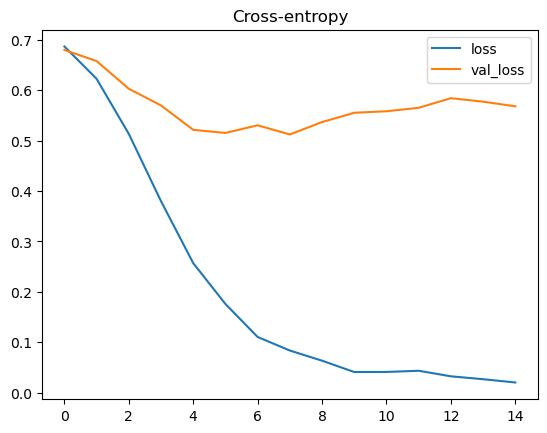

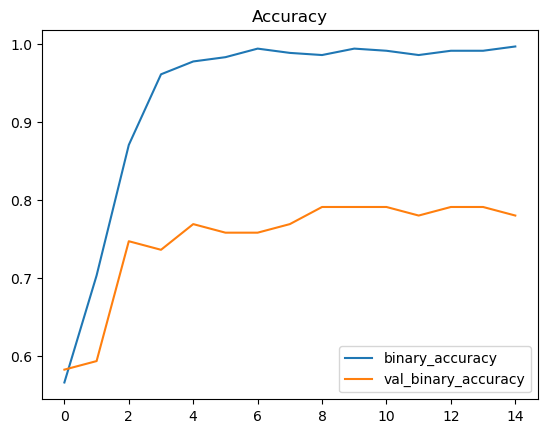

In [195]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.1,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=15,
#    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

4/4 [==============================] - 0s 10ms/step


2022-11-10 23:52:23.807266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


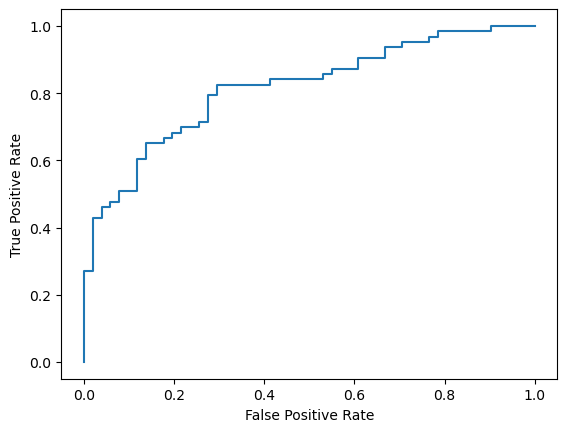

In [170]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict(X_test))
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

TypeError: in user code:


    TypeError: tf__predict_function() missing 1 required positional argument: 'iterator'


# Sauvegarde des résultats
---

# Conclusions
---

- 

# Bricolages
---

In [ ]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

In [ ]:
len(ignore_words)

In [ ]:
import re

In [ ]:
for word in ignore_words:
    if re.match(r'dépl',word):
        print(word)

In [ ]:
iw2 = []
for word in ignore_words:
    iw2.append(tokenizer(word))

In [ ]:
len(iw2)